<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Exploring Soil Nutrients and Their Impact on Crop Yield</b></div><div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

Agriculture is the backbone of many economies, and understanding soil nutrients is crucial for maximizing crop yield. This dataset provides a fascinating glimpse into the various factors that influence soil fertility and crop production. Let's dive in and see what insights we can uncover.

If you find this notebook useful, please consider upvoting it.

# Table of Contents
- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Descriptive Statistics](#Descriptive-Statistics)
  - [Visualizations](#Visualizations)
- [Correlation Analysis](#Correlation-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Discussion and Future Work](#Discussion-and-Future-Work)

# Introduction
In this notebook, we will explore the `Soil Nutrients` dataset to understand the relationships between various soil properties and crop yield. We will perform data cleaning, exploratory data analysis, and build a predictive model to estimate crop yield based on soil characteristics.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ensure inline plotting
%matplotlib inline

# Data Loading
Let's load the dataset and take a quick look at its structure.

In [2]:
# Load the dataset
file_path = '/kaggle/input/soil-nutrients/Soil Nutrients.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,low_acidic,Loam,Summer,10.0,10.0,10.0
1,Strawberry,Moderate,Day Neutral,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,low_acidic,Loam,Spring,10.0,10.0,10.0
2,Strawberry,Moderate,Short Day Period,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,low_acidic,Loam,Summer,10.0,10.0,10.0
3,Strawberry,Moderate,Short Day Period,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,low_acidic,Loam,Summer,10.0,10.0,10.0
4,Strawberry,Moderate,Day Neutral,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,low_acidic,Loam,Spring,10.0,10.0,10.0


# Data Cleaning and Preprocessing
Before diving into analysis, it's important to clean and preprocess the data. This includes handling missing values, encoding categorical variables, and ensuring data types are correct.

In [3]:
# Check for missing values
df.isnull().sum()

Name               0
Fertility          0
Photoperiod        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Nitrogen           0
Phosphorus         0
Potassium          0
Yield              0
Category_pH        0
Soil_Type          0
Season             0
N_Ratio            0
P_Ratio            0
K_Ratio            0
dtype: int64

In [4]:
# Check data types
df.dtypes

Name                object
Fertility           object
Photoperiod         object
Temperature        float64
Rainfall           float64
pH                 float64
Light_Hours        float64
Light_Intensity    float64
Rh                 float64
Nitrogen           float64
Phosphorus         float64
Potassium          float64
Yield              float64
Category_pH         object
Soil_Type           object
Season              object
N_Ratio            float64
P_Ratio            float64
K_Ratio            float64
dtype: object

The dataset appears to be clean with no missing values. Let's proceed to encode categorical variables.

In [5]:
# Encode categorical variables
categorical_cols = ['Name', 'Fertility', 'Photoperiod', 'Category_pH', 'Soil_Type', 'Season']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,...,Fertility_Moderate,Photoperiod_Long Day Period,Photoperiod_Short Day Period,Category_pH_low_alkaline,Category_pH_neutral,Soil_Type_Sandy,Soil_Type_Sandy Loam,Season_Spring,Season_Summer,Season_Winter
0,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,...,True,False,False,False,False,False,False,False,True,False
1,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,...,True,False,False,False,False,False,False,True,False,False
2,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,...,True,False,True,False,False,False,False,False,True,False
3,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,...,True,False,True,False,False,False,False,False,True,False
4,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,...,True,False,False,False,False,False,False,True,False,False


# Exploratory Data Analysis
Let's explore the dataset to understand the distribution of variables and their relationships.

## Descriptive Statistics
We'll start by looking at some basic statistics of the dataset.

In [6]:
# Display descriptive statistics
df.describe()

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,N_Ratio,P_Ratio,K_Ratio
count,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000
mean,20.801671,948.814222,6.473372,9.459365,398.048832,67.117251,142.769483,107.659893,180.481105,22.749990,12.636364,11.704545,12.477273
std,4.415164,340.884493,0.449111,2.588466,190.512173,19.005233,58.524592,72.778284,103.989340,15.541414,14.028173,5.761853,7.805376
min,9.355908,409.927161,4.888871,5.044913,69.146572,29.877266,41.725552,13.155191,34.982329,0.770213,5.000000,10.000000,5.000000
25%,17.915142,707.799164,6.245973,7.017129,265.438161,53.009874,117.631453,57.627430,107.263425,11.978009,10.000000,10.000000,10.000000
50%,19.929578,846.623453,6.466286,8.985917,385.299681,63.248496,140.524941,87.731849,163.891242,21.232615,10.000000,10.000000,10.000000
75%,22.936714,1109.157262,6.697254,12.019180,508.211962,89.996774,160.186895,145.298926,223.236991,28.812111,10.000000,10.000000,10.000000
max,39.913892,2508.052849,8.023210,15.918024,985.186247,99.927439,409.639573,360.043619,579.953931,66.619242,75.000000,37.500000,37.500000


## Visualizations
Visualizations can provide insights that are not immediately obvious from raw data.

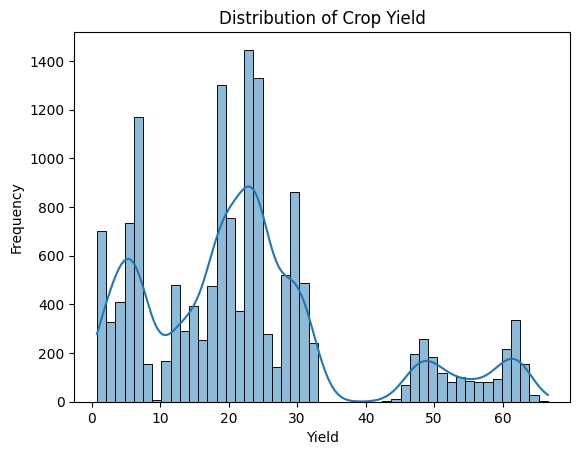

In [7]:
# Histogram of Yield
sns.histplot(df['Yield'], kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

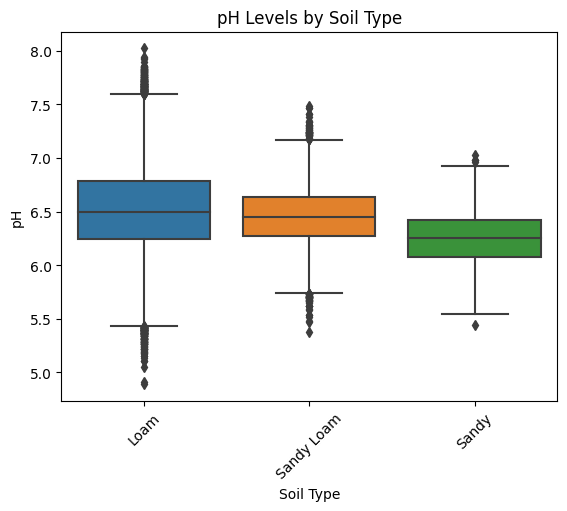

In [8]:
# Box plot of pH by Soil Type
sns.boxplot(x='Soil_Type', y='pH', data=df)
plt.title('pH Levels by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis
Let's examine the correlation between numeric variables to identify potential relationships.

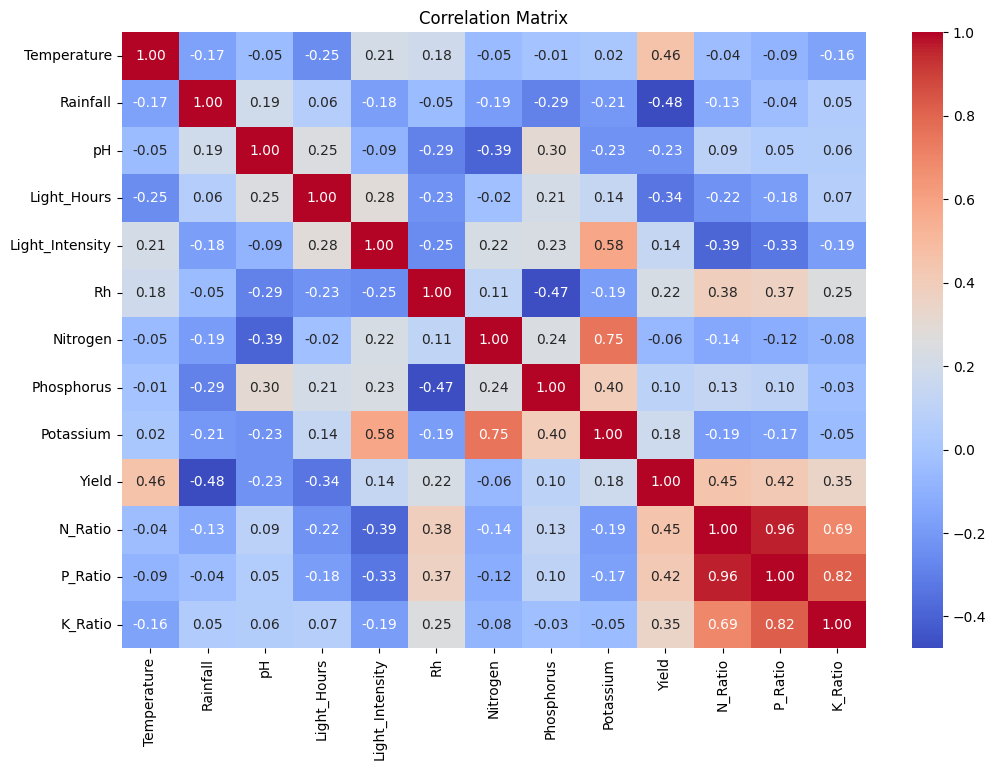

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Predictive Modeling
We will build a predictive model to estimate crop yield based on soil characteristics using a Random Forest Regressor.

In [10]:
# Define features and target variable
X = df_encoded.drop('Yield', axis=1)
y = df_encoded['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1.4510889261666313, 0.9942294575638195)

# Discussion and Future Work
In this notebook, we explored the `Soil Nutrients` dataset to understand the factors affecting crop yield. We performed data cleaning, exploratory data analysis, and built a predictive model using a Random Forest Regressor. The model's performance can be further improved by tuning hyperparameters or exploring other algorithms.

Future work could involve:
- Investigating the impact of individual soil nutrients on specific crop types.
- Incorporating additional environmental factors such as humidity or sunlight duration.
- Exploring time-series analysis if temporal data is available.

If you found this notebook insightful, please consider upvoting it.